<a href="https://colab.research.google.com/github/CHRISTINEMUTHEE/FINANCE-DATASET/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_09_Christine_Muthee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis




 ## 1. Defining the Question




### a.) Specifying the Data Analytic question


1. Which individuals are most likely to have or use a bank account?

### b.) Defining the Metric for success




*   Our Metric for success is actually finding the individuals that are likely to have access to a bank account.
*   To find out the factor leading to the same that we will know the key demographic factors driving individuals financial outcomes.
*   To know upon analysis the state of financial inclusion in Kenya,Rwanda,Tanzania and Uganda.

### c.) Understanding the Context



* The concept of inclusive growth is multifaceted and has financial inclusion as one of its main building blocks. Approximately 9.1 M (13.9%) of the adult people in Kenya,Tanzania,Uganda and Rwanda have access to a bank account.

* Banks play a vital role in facilitating access to financial services,encouraging saving ,facilitating payment(especially with rise in the mobile banking technology),Building credit worthiness and accessing other financal services eg. loans for asset financing and so on.

* At an artshell, access to a bank account is a contributor to long term economic growth which is key in sustainable development







### d.)Recording the experimental Design


* My experiment is aimed at knowing how i can predict which individuals are most likely to have/use a bank account.
* My dataset is focused on a survey in Kenya,Tanzania,Uganda and Rwanda. The variables there in are included in the data relevance section.
*   My experiment will involve loading and viewing the dataset to identify datatypes and outliers,cleaning the dataset,checking for missing values, performing a univariate analysis on the variables of great importance,performing a bivariate analysis to view the relationship between our variables and their strength thereof. To perform a Multivariate analysis and reduction techniques to identify the key variable to use in prediction
*   I will later implement the solution and review it to challenge my solution and provide recomendations.

### d.) Data Relevance

* The variables in my dataset include:
1. Country interviewee is in.
2. The year the survey was done
3. Unique Identifier of each interviewee
4. Rural or Urban status
5. Access to a cell phone
6. Number of people living in a house
7. Age of the interviewee
8. Gender
9. Interviewee relationship with the head of the family
10. Marital status
11. Highest level of education
12. Type of job of the interviewee.

* They are contextually accurate and therefore relevant for my analysis.


## 2. Reading the Data

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

In [332]:
#Loading the data from the source using a function
# Dataset url=http://bit.ly/FinancialDataset
def Dataframe(url):
  Finance_df=pd.read_csv(url)
  return Finance_df
Dataframe('http://bit.ly/FinancialDataset')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [333]:
# Determining the no of records in our dataset
Finance_df=Dataframe('http://bit.ly/FinancialDataset')
print('My finance dataset has:'+' '+str(Finance_df.shape[0])+' '+'rows'+'and'+' '+str(Finance_df.shape[1])+' '+'columns')

My finance dataset has: 23524 rowsand 13 columns


In [334]:
#Previewing my dataset
print(Finance_df.head())
print(Finance_df.tail())

  country  year  ...              Level of Educuation                Type of Job
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed

[5 rows x 13 columns]
      country  year  ...  Level of Educuation    Type of Job
23519  Uganda  2018  ...  No formal education   Other Income
23520  Uganda  2018  ...  Secondary education   Other Income
23521  Uganda  2018  ...    Primary education   Other Income
23522  Uganda  2018  ...  Secondary education  Self employed
23523  Uganda  2018  ...  Secondary education      No Income

[5 rows x 13 columns]


In [335]:
#Checking whether each column has an appropriate datatype
Finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. External Data Source Validation

### a.) Validation

In [336]:
# Using the variable definion i verified that indeed what was in the columns was approprate..
#The variation url is as follows
#Variable Url=http://bit.ly/VariableDefinitions
Var_df=pd.read_csv('http://bit.ly/VariableDefinitions')
Var_df
# Finance_df.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## 5.Tidying the Dataset

In [337]:
# Getting rid of unnecessary columns
Finance_df.drop(['uniqueid','year'],axis=1,inplace=True)
Finance_df.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [338]:
# Converting the 'Has a bank account to 1 and 0 for yes and no respectively to know whether outliers are present
Conv_Finance_df=Finance_df.replace({'Has a Bank account' : { 'Yes' : 1, 'No' : 0}})
Conv_Finance_df
Conv_Finance_df['Has a Bank account'].astype(float)

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
23519    0.0
23520    0.0
23521    0.0
23522    0.0
23523    0.0
Name: Has a Bank account, Length: 23524, dtype: float64

In [339]:
Conv_Finance_df.dtypes

country                    object
Has a Bank account        float64
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


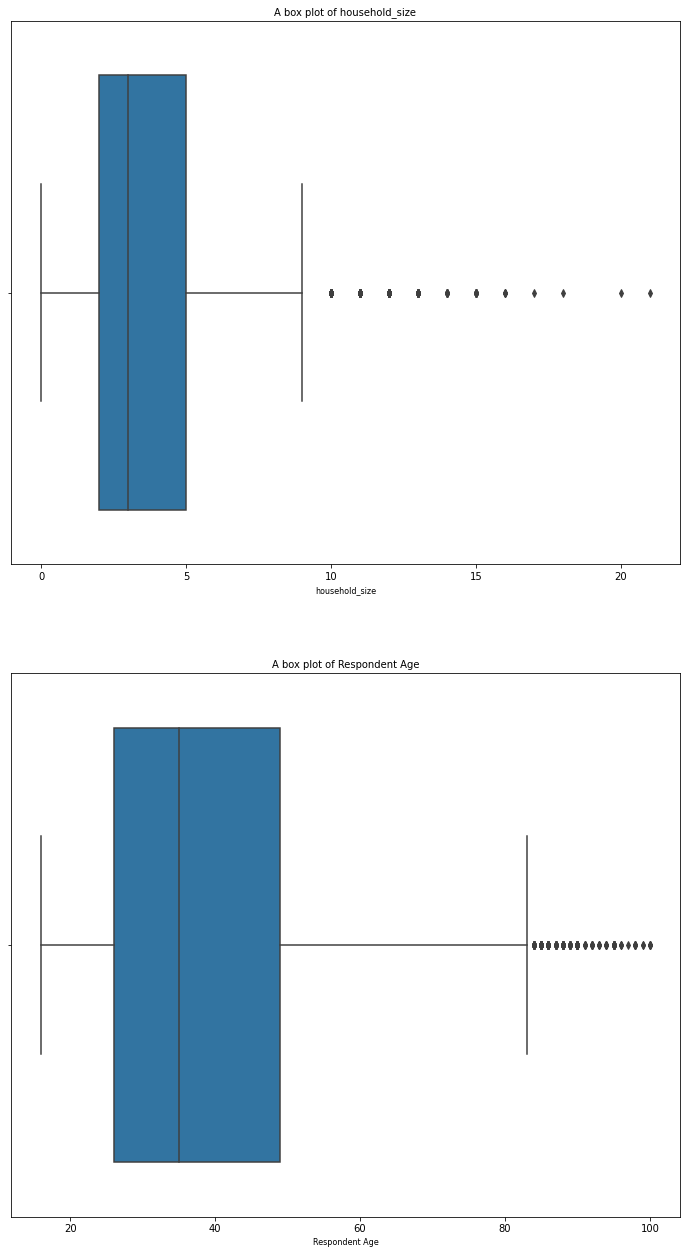

In [340]:
#Checking for outliers in several columns 
col_names=['household_size','Respondent Age']
fig,ax=plt.subplots(len(col_names),figsize=(12,22))

for i, col_vals in enumerate(col_names):
  sns.boxplot(Conv_Finance_df[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of'+' '+col_vals,fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()
# House hold size on the other hand prooved to have several outliers ranging from 10 to 20.
# Most of the values were within 0-10.We will proove that with an IQR.
# Respondent age also had outliers. Most values were within the range of approximately 20 to 60. 
# It is poissible however to have a bank account at the age of above 80. 
# The outlier would fall if we had an age below Q1
# An important point to note is that they are not anomalies since we are looking for adult ages and according to the survey in east Africa, the adult age is 18 years and above.

In [341]:
# Checking for anomalies
Conv_Finance_df.describe(include='all')
# We tend to detect anomalies in the count as the counts are not equal.
# Cell phone access has the highest counts. 
# This could mean that it has either more or less entries as compared to the rest. 
# This means theres presence of additional values,duplicate values or less values as we will see while checking for missing values. 
# The mean household size is 3.68,Respondent Age=38.804.This are not anomalies.


,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23488.000000,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,0.140880,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.347906,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [342]:
#Identifying Missing Data
Conv_Finance_df.isnull().any()

country                   True
Has a Bank account        True
Type of Location          True
Cell Phone Access         True
household_size            True
Respondent Age            True
gender_of_respondent      True
The relathip with head    True
marital_status            True
Level of Educuation       True
Type of Job               True
dtype: bool

In [343]:
#Dealing with missing values
Conv_Finance_df.dropna(inplace=True)

In [344]:
#Confirming Operation.
Conv_Finance_df.isnull().any()

country                   False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [345]:
#Checking with duplicates
Conv_Finance_df.duplicated().any()

True

In [346]:
# Dropping duplicated values
Conv_Finance_df.drop_duplicates(inplace=True)

In [347]:
#Confirming operation
Conv_Finance_df.duplicated().any()

False

## 6. Exploratory Analysis 

### a.) Univariate Analysis

In [348]:
# Plotting univariate summaries and recording observations
# Measures of central tendancy:
Conv_Finance_df.describe(include='all')

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,18971,18971.000000,18971,18971,18971.000000,18971.000000,18971,18971,18971,18971,18971
unique,4,NaN,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,6647,NaN,11669,14017,NaN,NaN,11288,10536,8643,9407,4818
mean,NaN,0.165094,NaN,NaN,3.750883,39.534342,NaN,NaN,NaN,NaN,NaN
std,NaN,0.371275,NaN,NaN,2.360730,17.069272,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,3.000000,36.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000,NaN,NaN,5.000000,50.000000,NaN,NaN,NaN,NaN,NaN


In [349]:
# Identifying the modal value of Household size and Respondent age respectively
print(Conv_Finance_df['household_size'].mode())
print(Conv_Finance_df['Respondent Age'].mode())
#Remember from the operation before the mean of household size =3.75 & the Respondent Age mean =39.534

0    2.0
dtype: float64
0    30.0
dtype: float64


In [418]:
#Identifying the deviation of our numerical datasets from the mean
print(Conv_Finance_df['household_size'].var())
print(Conv_Finance_df['Respondent Age'].var())

5.573045477648131
291.36006200625025


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


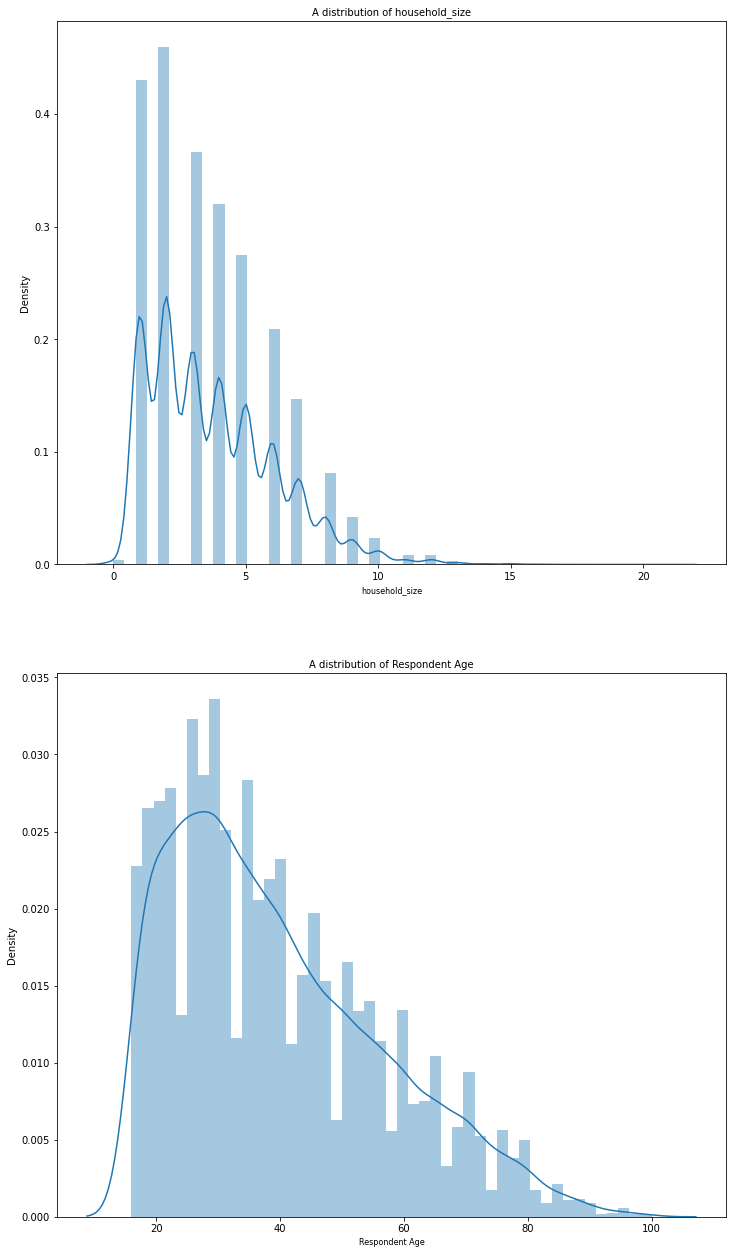

In [350]:
# Distribution of numerical columns
# col_names=['Has a Bank account','household_size','Respondent Age']
col_names=['household_size','Respondent Age']
fig,ax=plt.subplots(len(col_names),figsize=(12,22))

for i, col_vals in enumerate(col_names):
  sns.distplot(Conv_Finance_df[col_vals],ax=ax[i],hist=True,kde=True)
  ax[i].set_title('A distribution of'+' '+col_vals,fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()
# Both graphs are positively skewed which shows that the mean is greater than the median and greater than mode.
# This could be influenced by the 'outliers' which were not rendered as anomalies therefore influencing a higher mean as can be seen by the skewness.
# House hold size is lighly tailed while the Respondent Age is heavily tailed: also influemced by the 'legitimate outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts of type of location categories')

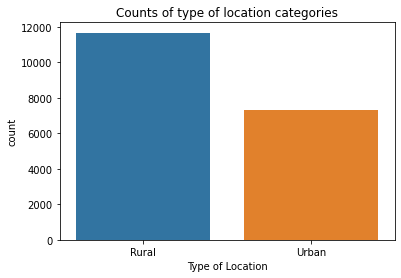

In [351]:
# Bar charts of caterogical value counts to understand the categories more involved in the survey than others

sns.countplot(Conv_Finance_df['Type of Location'].dropna(),order=Conv_Finance_df['Type of Location'].value_counts().index)
plt.title('Counts of type of location categories')
# Rural areas were more involved in the survey than urban

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts of Cell phone Access')

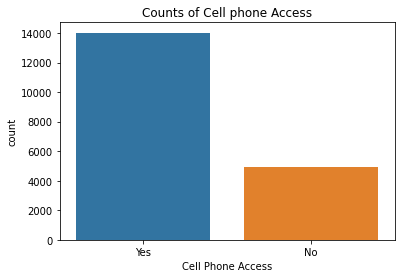

In [352]:
sns.countplot(Conv_Finance_df['Cell Phone Access'].dropna(),order=Conv_Finance_df['Cell Phone Access'].value_counts().index)
plt.title('Counts of Cell phone Access')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts of Gender of respondents')

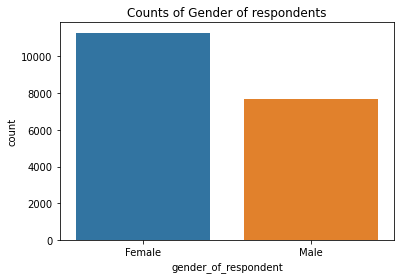

In [353]:
sns.countplot(Conv_Finance_df['gender_of_respondent'].dropna(),order=Conv_Finance_df['gender_of_respondent'].value_counts().index)
plt.title('Counts of Gender of respondents')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

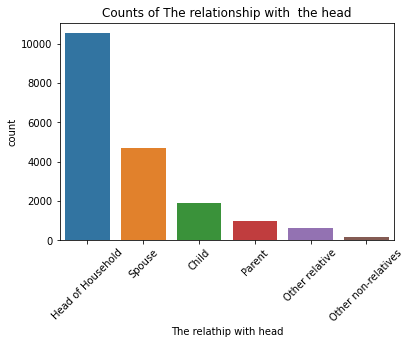

In [354]:
sns.countplot(Conv_Finance_df['The relathip with head'].dropna(),order=Conv_Finance_df['The relathip with head'].value_counts().index)
plt.title('Counts of The relationship with  the head')
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

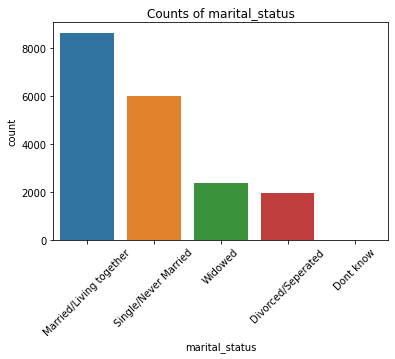

In [355]:
sns.countplot(Conv_Finance_df['marital_status'].dropna(),order=Conv_Finance_df['marital_status'].value_counts().index)
plt.title('Counts of marital_status')
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

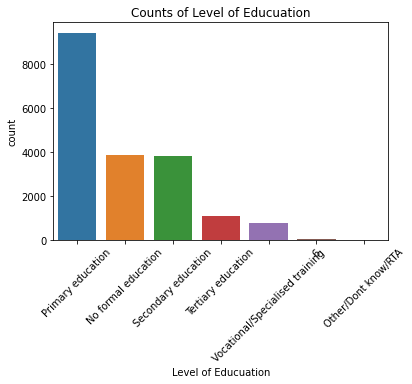

In [356]:
sns.countplot(Conv_Finance_df['Level of Educuation'].dropna(),order=Conv_Finance_df['Level of Educuation'].value_counts().index)
plt.title('Counts of Level of Educuation')
plt.xticks(rotation=45)

In [357]:
#Function to define IQR in order to remove Outliers. The outliers in my dataset are not anomalies bt they might affect my model thus the removal
def IQR_calculation(dataframe,column):
  column=['household_size','Respondent Age']
  for i in column:
    Q1=dataframe[column].quantile(0.25)
    Q3=dataframe[column].quantile(0.75)
    IQR=Q3-Q1
    return IQR
IQR_calculation(Conv_Finance_df,i)

household_size     3.0
Respondent Age    24.0
dtype: float64

In [358]:
#Getting rid of my outliers
def Outlier_removal(data,column):
  Q3=data[column].quantile(0.75)
  Q1=data[column].quantile(0.25)
  IQR=Q3-Q1
  upper_range=Q3+1.5*Q3
  lower_range=Q1-1.5*Q3
  New_team_df=data[(data[column]>lower_range)&(data[column]<upper_range)]
  return New_team_df

cols=['household_size','Respondent Age']
for i in cols:
  Clean_dataset=Outlier_removal(Conv_Finance_df,i)
Clean_dataset.shape
# The shape has changed from 23524 rows and 13 columns. We have a clean dataset. Without Unnecessary columns and outliers.

(18971, 11)

In [359]:
Clean_dataset.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,1.0,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,0.0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,1.0,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,0.0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,0.0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


### b.) Bi-variate Analysis

In [360]:
#  Clean_finance_df.head()

In [361]:
#Performing a correlation of numeric varaiables.
Clean_dataset.corr()
#There is no correlation between numerical columns. 
# Here i used the 'Has a bank account as a numerical variable to see its relationship with other numerical columns.


,Has a Bank account,household_size,Respondent Age
Has a Bank account,1.000000,-0.032584,0.008804
household_size,-0.032584,1.000000,-0.125214
Respondent Age,0.008804,-0.125214,1.000000


<function matplotlib.pyplot.show>

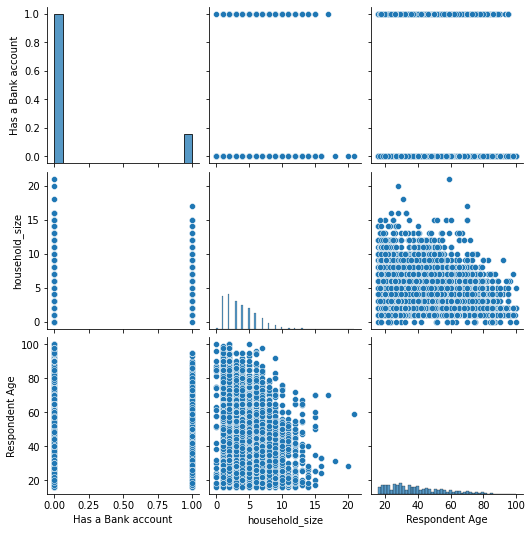

In [362]:
sns.pairplot(Clean_dataset)
plt.show
#There's no coorelation in the Respondent Age and Household size to the Bank account status

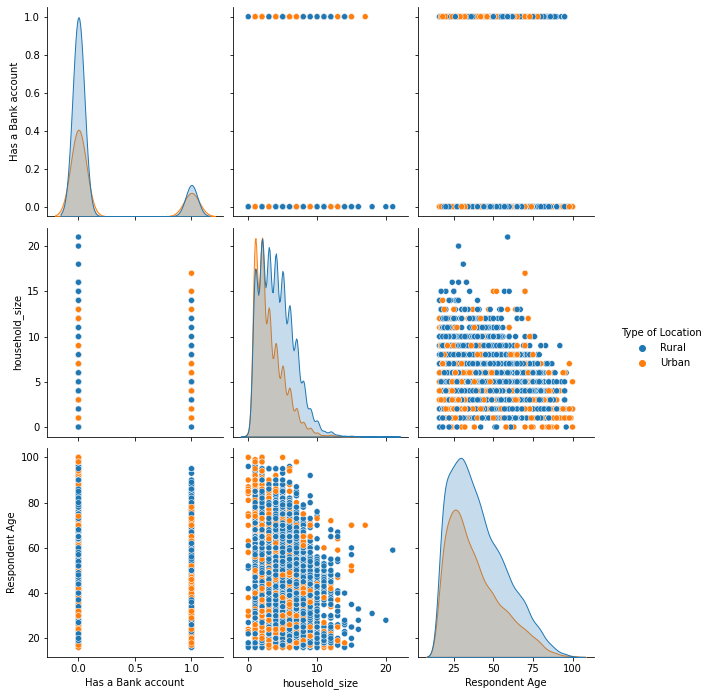

In [363]:
# Comparison of the relationship between type of location with the Bank accountstatus,Household size and  respondent age.
Rur_urb=sns.pairplot(Clean_dataset,hue='Type of Location')
Rur_urb.fig.set_size_inches(10,10)
# plt.show
# People in rural areas who dont have an account ie. Bank acount status=0 is higher than people in urban areas
# The higher level of respondent age lives in rural areas as compared to the age of lower aged respondents.

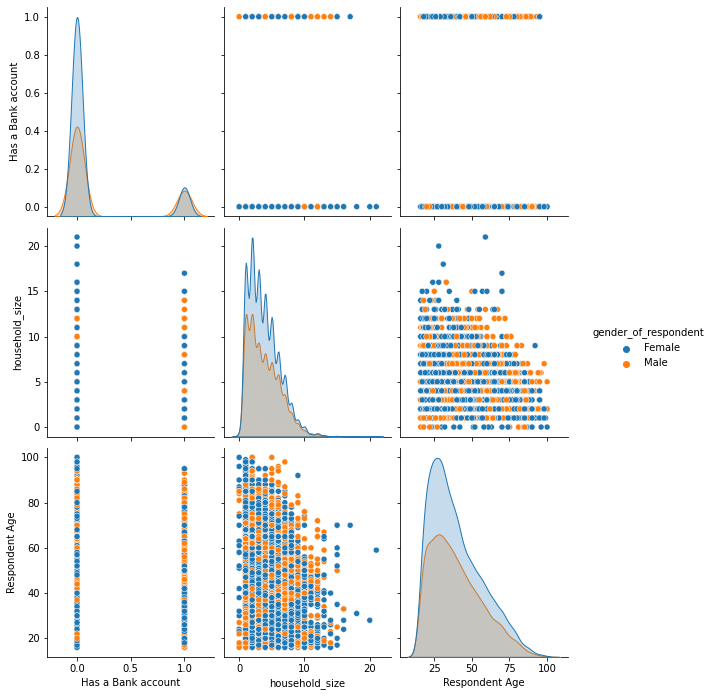

In [364]:
# Comparison of the relationship between Gender with the Bank account status,Household size and  respondent age.
Gend=sns.pairplot(Clean_dataset,hue='gender_of_respondent')
Gend.fig.set_size_inches(10,10)
# Males with bank accounts are larger than females with bank accounts
# Females with a higher age took the survey more than makes

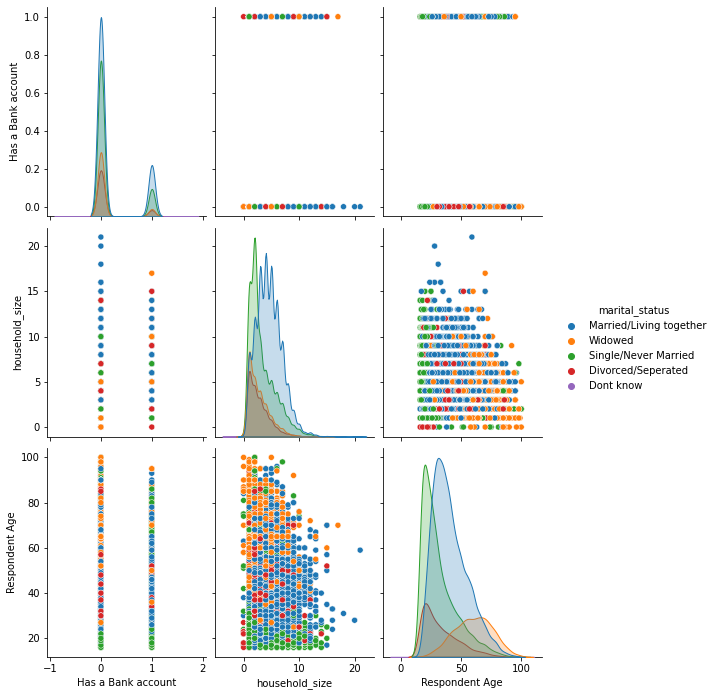

In [365]:
# Relationship between marital status and Bank account status,Household size and  respondent age.
Marr=sns.pairplot(Clean_dataset,hue='marital_status')
Marr.fig.set_size_inches(10,10)
# The highest respondent age prooved to be married.

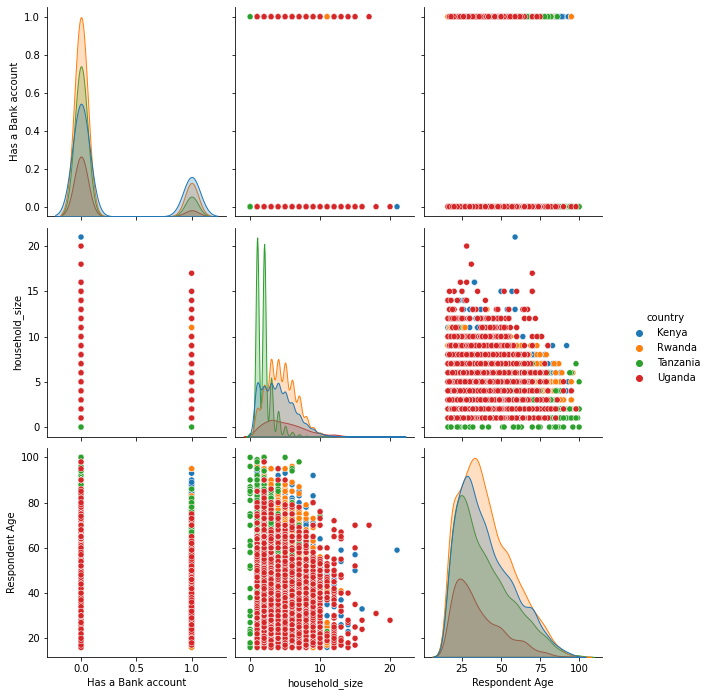

In [366]:
Country=sns.pairplot(Clean_dataset,hue='country')
Country.fig.set_size_inches(10,10)
#Tz have a greater household size as compared to other countries
#Rwandese population with no bank account is greater than othe countries
# Rwandese Respondent age is higher

### c.) MultiVariate Analysis

In [368]:
# The variables seem to be increasing thus resulting to a multivariate analysis.
# I will use reduction techniques to see which model is best fit to predict the likelihood of having a bank account.

In [ ]:
#Replacing Yes and No status to my dataset to perform Multivariate Analysis

Clean_finance_df=Clean_dataset.replace({'Has a Bank account' : { 1 : 'Yes', 0 : 'No'}})
Clean_finance_df
# Changing Datatype to object:Categorical
Clean_finance_df['Has a Bank account'].astype(object)

In [391]:
Clean_finance_df.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [394]:
#Preprosessing
#I will divide my dataset into a feature set and asign another variable to the corresponding labels and then divide the resultant dataset into training and test sets.
X=Clean_finance_df.drop(Clean_finance_df.iloc[:,6:].columns,axis=1)
X
Features=X.drop(X.iloc[:,:5],axis=1)
Features

,Respondent Age
0,24.0
1,70.0
2,26.0
3,34.0
4,26.0
...,...
23519,48.0
23520,27.0
23521,27.0
23522,30.0


In [407]:
# My corresponding label will be the
Y=Clean_finance_df.drop(Clean_finance_df.iloc[:,2:],axis=1)
Y
Labels=Y.drop('country',axis=1)
Labels

,Has a Bank account
0,Yes
1,No
2,Yes
3,No
4,No
...,...
23519,No
23520,No
23521,No
23522,No


In [410]:
#Dividing my data into Training and Test sets
from sklearn.model_selection import train_test_split
Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels, test_size=0.2, random_state=0)

In [409]:
#Feature Scaling. This is done to standardize/Normalize my features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Features_train = sc.fit_transform(Features_train)
Features_test = sc.transform(Features_test)


In [399]:
#Performing PCA to retrieve Principle Components
from sklearn.decomposition import PCA
pca=PCA()
Features_train = pca.fit_transform(Features_train)
Features_test = pca.transform(Features_test)
Features_train
Features_test


array([[-0.96669815],
       [-0.90801429],
       [-0.55591118],
       ...,
       [ 0.96986899],
       [-1.08406585],
       [ 0.61776588]])

In [403]:
#Using Principlal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
Features_train = pca.fit_transform(Features_train)
Features_test = pca.transform(Features_test)
Features_train
Features_test

array([[-0.96669815],
       [-0.90801429],
       [-0.55591118],
       ...,
       [ 0.96986899],
       [-1.08406585],
       [ 0.61776588]])

In [405]:
#Training and Making Prediction
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(Features_train, Labels_train)

# Predicting the Test set results
Labels_pred = classifier.predict(Features_test)
Pred_df=pd.DataFrame(Labels_pred)
Pred_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


,0
0,No
1,No
2,No
3,No
4,No
...,...
3790,No
3791,No
3792,No
3793,No


In [411]:
#Performance Evaluation of the PC's
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Labels_test, Labels_pred)
print(cm)
print('Accuracy' , accuracy_score(Labels_test, Labels_pred))


[[3202    0]
 [ 593    0]]
Accuracy 0.843741765480896


In [413]:
#Factor Analysis
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(Clean_dataset)
chi_square_value, p_value

#Our dataset failed the Barlett's test since the test of significance pvalue was greater than the threshhold of 0.05. 

(320.28634995097946, 1.777689517574194e-39)

In [416]:
#Using LDA to get the linear Discriminants
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
Features_train = lda.fit_transform(Features_train, Labels_train)
Features_train
Features_test = lda.transform(Features_test)
Features_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.84930186],
       [ 0.03092631],
       [ 1.49797325],
       ...,
       [-0.49721059],
       [-0.2038012 ],
       [ 0.03092631]])

In [419]:
#Training and Making Predictions using LDA for Age projection on Ownership of a bank account..
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(Features_train, Labels_train)
Labels_pred = classifier.predict(Features_test)
Labels_pred 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [420]:
#Testing the accuracy of my model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Labels_test, Labels_pred)
print(cm)
print('Accuracy' + str(accuracy_score(Labels_test, Labels_pred)))
# The same accuracy was achieved with the principlal components

[[3202    0]
 [ 593    0]]
Accuracy0.843741765480896


In [421]:
Clean_finance_df.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [440]:
# Using house_hold size.
X2=Clean_finance_df.drop(Clean_finance_df.iloc[:,5:].columns,axis=1)
X2
Features2=X2.drop(X2.iloc[:,:4].columns,axis=1)
Features2

,household_size
0,3.0
1,5.0
2,5.0
3,5.0
4,8.0
...,...
23519,4.0
23520,2.0
23521,5.0
23522,7.0


In [429]:
# Label remains the same
Y2=Clean_finance_df.drop(Clean_finance_df.iloc[:,2:],axis=1)
Y2
Labels2=Y2.drop('country',axis=1)
Labels2


,Has a Bank account
0,Yes
1,No
2,Yes
3,No
4,No
...,...
23519,No
23520,No
23521,No
23522,No


In [441]:
#Dividing my data into Training and Test sets
from sklearn.model_selection import train_test_split
Features2_train, Features2_test, Labels2_train, Labels2_test = train_test_split(Features2, Labels2, test_size=0.2, random_state=0)

In [443]:
#Feature Scaling. This is done to standardize/Normalize my features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Features2_train = sc.fit_transform(Features2_train)
Features2_train
Features2_test = sc.transform(Features2_test)
Features2_test

array([[-1.17074723],
       [-1.17074723],
       [ 0.10475063],
       ...,
       [ 0.10475063],
       [-0.74558128],
       [ 3.50607824]])

In [444]:
#Performing PCA to retrieve Principle Components
from sklearn.decomposition import PCA
pca=PCA()
Features2_train = pca.fit_transform(Features2_train)
Features2_test = pca.transform(Features2_test)
Features2_train
Features2_test

array([[-1.17074723],
       [-1.17074723],
       [ 0.10475063],
       ...,
       [ 0.10475063],
       [-0.74558128],
       [ 3.50607824]])

In [445]:
#Training and Making Prediction
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(Features2_train, Labels2_train)

# Predicting the Test set results
Labels2_pred = classifier.predict(Features2_test)
Pred2_df=pd.DataFrame(Labels2_pred)
Pred2_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


,0
0,No
1,No
2,No
3,No
4,No
...,...
3790,No
3791,No
3792,No
3793,No


In [446]:
#Performance Evaluation of the PC's
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Labels2_test, Labels2_pred)
print(cm)
print('Accuracy' , accuracy_score(Labels2_test, Labels2_pred))
#The same prediction applies for HouseholdPopulation

[[3202    0]
 [ 593    0]]
Accuracy 0.843741765480896


## 7. Implementing the Solution

In [456]:
#Country count where the Bank account status is YES.(Demographic category)
With_accounts=Clean_finance_df[Clean_finance_df['Has a Bank account']=='Yes']
Cat_col=['country','Type of Location']
for i in Cat_col:
  Freq=With_accounts[Cat_col].value_counts()
Freq
#Kenyans in urban areas are more likely to have a bank account

country   Type of Location
Kenya     Urban               851
          Rural               601
Rwanda    Rural               581
          Urban               371
Tanzania  Rural               338
          Urban               211
Uganda    Urban               116
          Rural                63
dtype: int64

In [457]:
#Gender and Cell phone access count where the Bank account status is YES.(Gender and access to cellphones)

With_accounts=Clean_finance_df[Clean_finance_df['Has a Bank account']=='Yes']
Cat_col=['gender_of_respondent','Cell Phone Access']
for i in Cat_col:
  Freq2=With_accounts[Cat_col].value_counts()
Freq2
#Males with cell phones are more likely to have a bank account

gender_of_respondent  Cell Phone Access
Male                  Yes                  1649
Female                Yes                  1380
Male                  No                     52
Female                No                     51
dtype: int64

In [460]:
#Type of job count where the Bank account status is YES.(Gender and access to cellphones)
With_accounts=Clean_finance_df[Clean_finance_df['Has a Bank account']=='Yes']
Cat_col=['Type of Job']
for i in Cat_col:
  Freq3=With_accounts[Cat_col].value_counts()
Freq3
#Self employed people score high in individuals with bank accounts

Type of Job                 
Self employed                   801
Farming and Fishing             596
Formally employed Private       525
Informally employed             422
Formally employed Government    290
Remittance Dependent            227
Other Income                    195
Government Dependent             49
Dont Know/Refuse to answer       14
No Income                        13
dtype: int64

## 8. Challenging the Solution


*  It is highly unlikely that self employed people Farmers and Fishers to posses bank accounts on a higher rate than formally employed people as it is assumed that salaries are deposited into their account.
* More investigation needs to be made to confirm this. Perhaps even a reinspection of the survey since all the data input was correct. 
* Could be that more self employed people ,fishers and farmers had the time to take the survey leaving an insufficient window for formally employed people to take the survey.





## 9. Follow-up questions

### a.) Did we have the right data?

The data was correct but insufficient to make a prediction 


### b.) Do we need other data to answer our questions?

Yes,we need data noting the times the survey was carried out to and to what part of the population it was exposed to

### c.) Did we have the right question?

Yes. We had the right question . It can however be strengthened by more data.